# Raspberry Pi と KV-7500 の ＭＣプロトコル／ＳＬＭＰ通信

【注意事項】

- 本コードは ＭＣプロトコル／ＳＬＭＰの交信コードは ＡＳＣＩＩで行う形で記述しています。  
- ＰＬＣのイーサネットユニットの設定で 初期値から交信コードはＡＳＣＩＩに変更した状態で通信を行ってください。
 
 また、使用する際にはイーサネットユニットの取り扱い説明書を熟読してから実施願います。

**特にデバイスへの書き込みは 誤動作による設備故障や労働災害の原因になりますので 十分注意すること**

## 通信の概要

端末（パソコン）側で通信プログラムを作成し、端末（パソコン）からイーサネットを経由してイーサ
ネットユニット にコマンドを送り、イーサネットユニットからイーサネットを経由してレスポンスを
受け取ることで、CPUユニットのデータの読み書きや、動作状態のモニタができます。通信時は、イーサ
ネットユニットを含むPLCがサーバとなり、パソコンなどの端末がクライアントになります。サーバは、
クライアントから受信したコマンドに対して適切なレスポンスを自動的にクライアントに返信します。
MCプロトコル/SLMP通信は、 TCP/IP 、 UDP/IP の2種類の通信プロトコルに対応しています。
SLMPの3Eフレームは、MCプロトコルQnA互換3Eフレーム*と同じフォーマット **※2** です。
イーサネットユニットはQnA互換3Eフレーム、4EフレームでのASCIIコードによる通信、バイナリコードによる通信に対応しています。


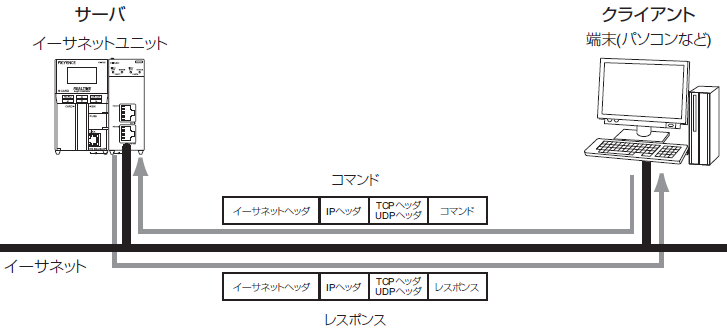

※2 SLMPの場合、MCプロトコルのフォーマットの以下の内容を読み換えてください。


| MCプロトコル | SLMP |
|----|----|
| PC番号 | 局番 |
| ユニットI/O番号 | プロセッサ番号 |
| デバイス | メモリ |
| デバイスコード | メモリタイプ |
| デバイス番号 | メモリ番号 |
| バッファメモリ読み出し/書き込み | デュアルポートメモリ一括読み出し/書き込み |
|インテリユニットバッファメモリ読み出し/書き込み | 拡張モジュール一括読み出し/書き込み |
| CPU形名読み出し | プロセッサタイプ読み出し |
| ユニットNo. | モジュール番号 |
| 形名プロセッサ | モジュール名 |


## 通信手順

MCプロトコル/SLMP通信は、TCP/IP、UDP/IP の2種類の通信プロトコルに対応しています。
TCP/IP とUDP/IP での、それぞれの通信のしくみについては、以下をご覧ください。

### TCP/IP使用時の通信のしくみ

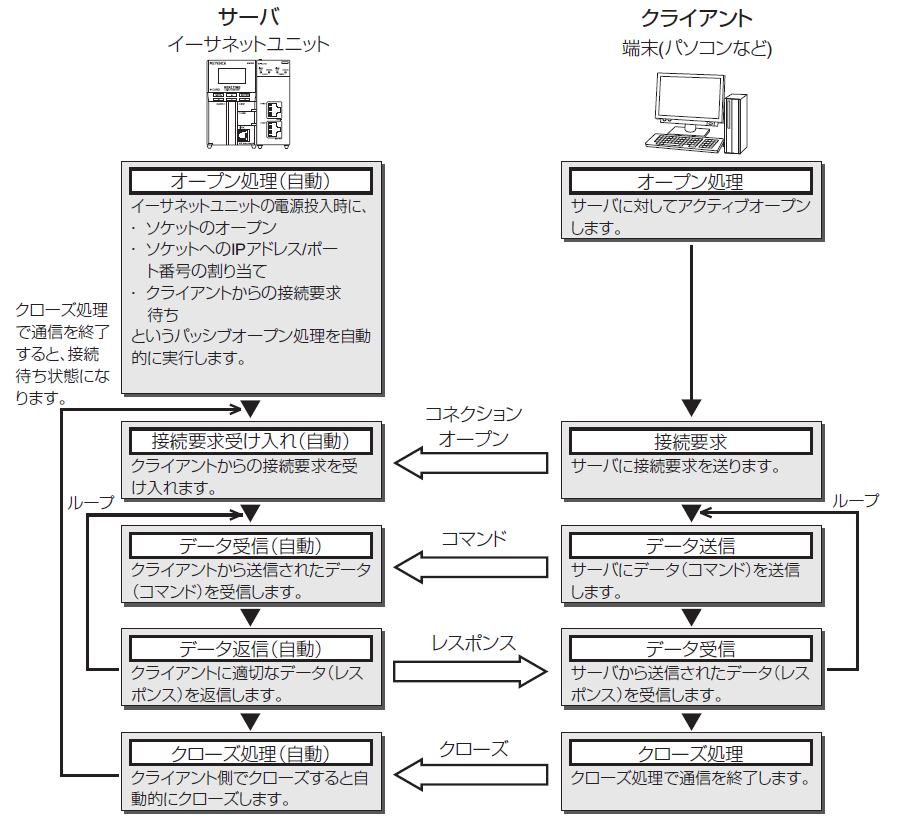

### UDP/IP使用時の通信のしくみ

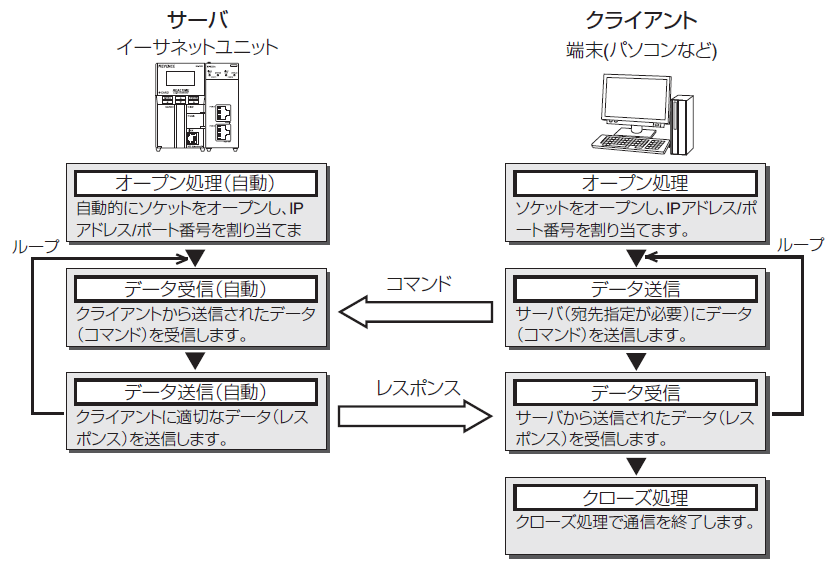

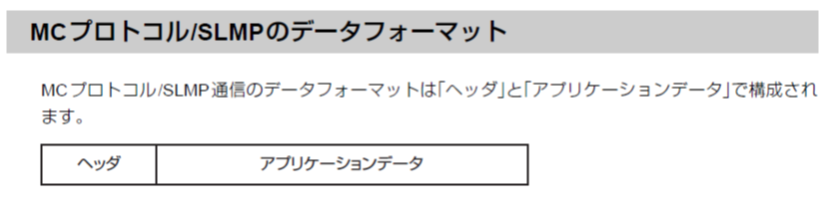

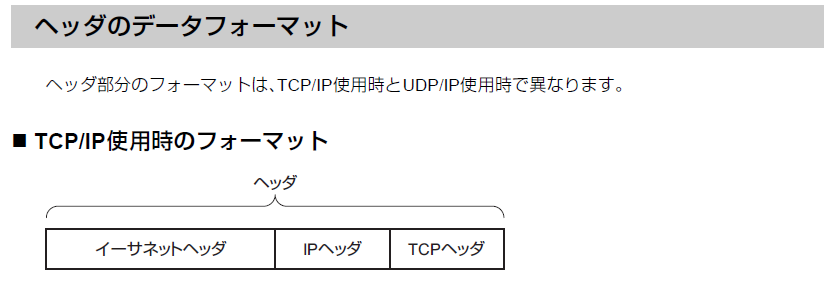

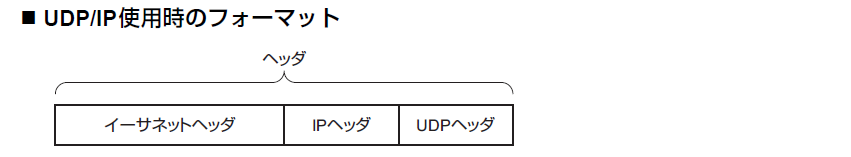

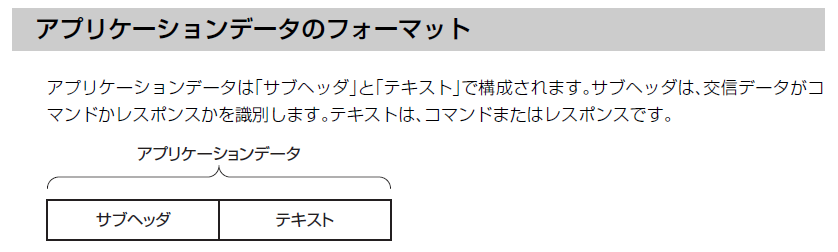

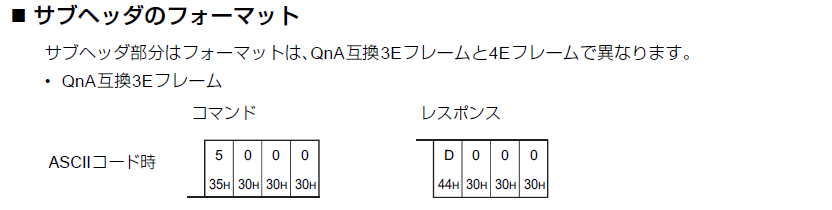

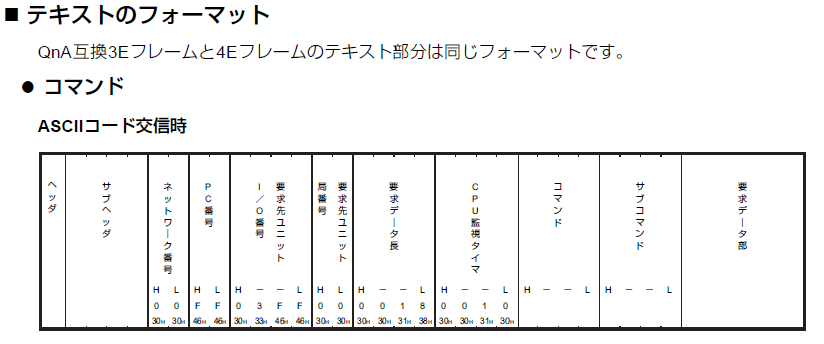

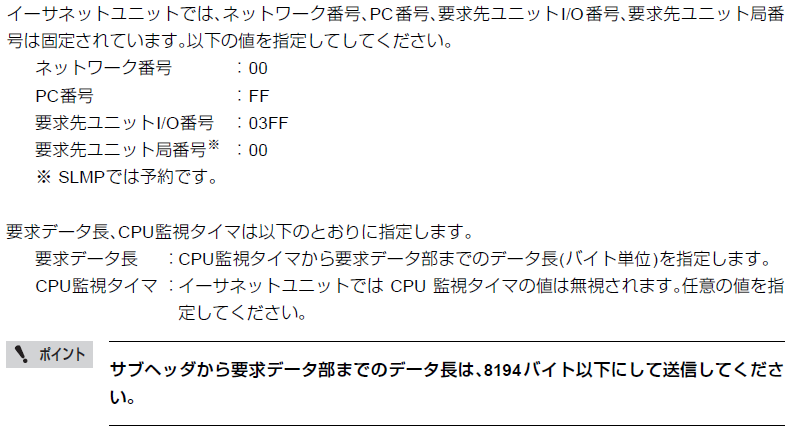

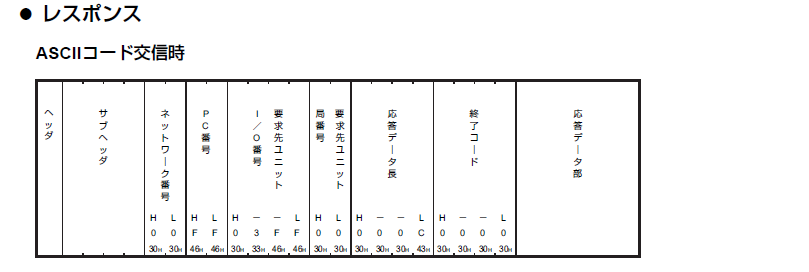

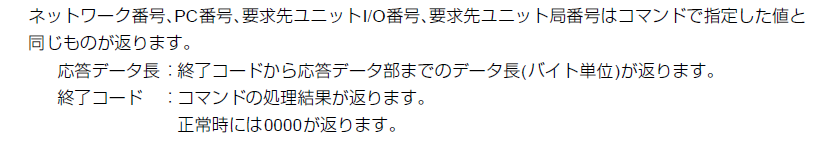

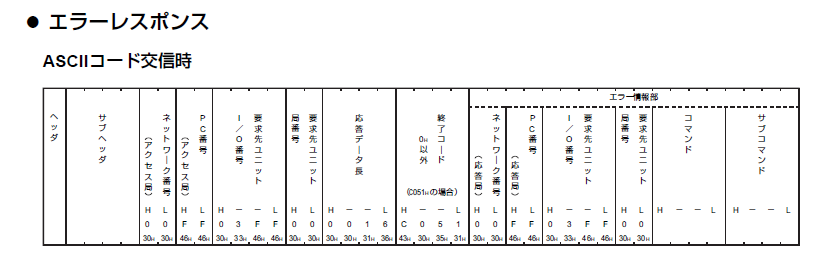

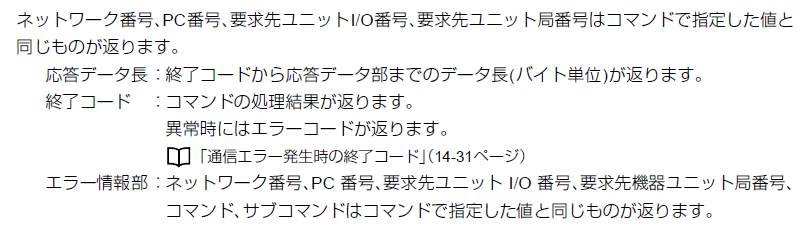

## コマンド一覧

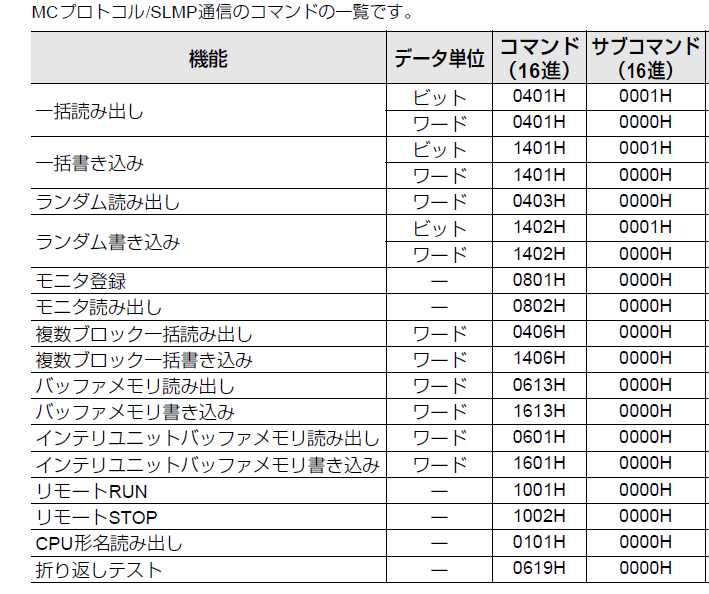

## デバイスの表記について

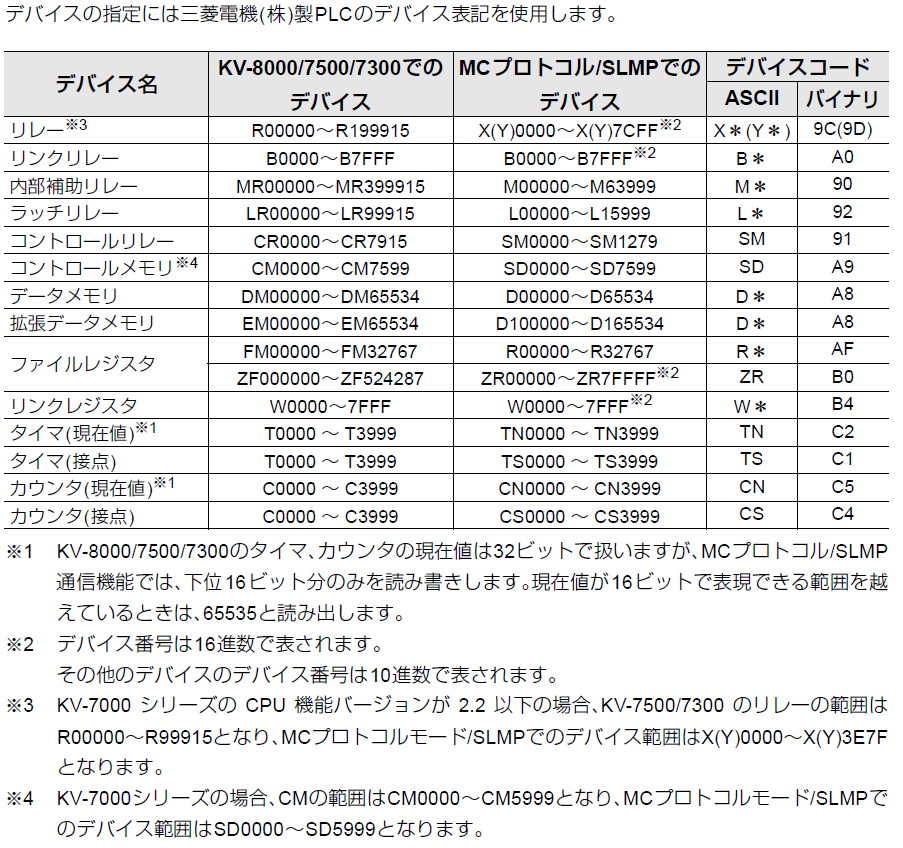

## 通信エラー発生時の終了コード

間違ったコマンドを送信したり、CPUユニットに異常があるときは、通常とは異なる終了コードが返信
されます。異常時の終了コードの内容、原因、対処は次のとおりです。

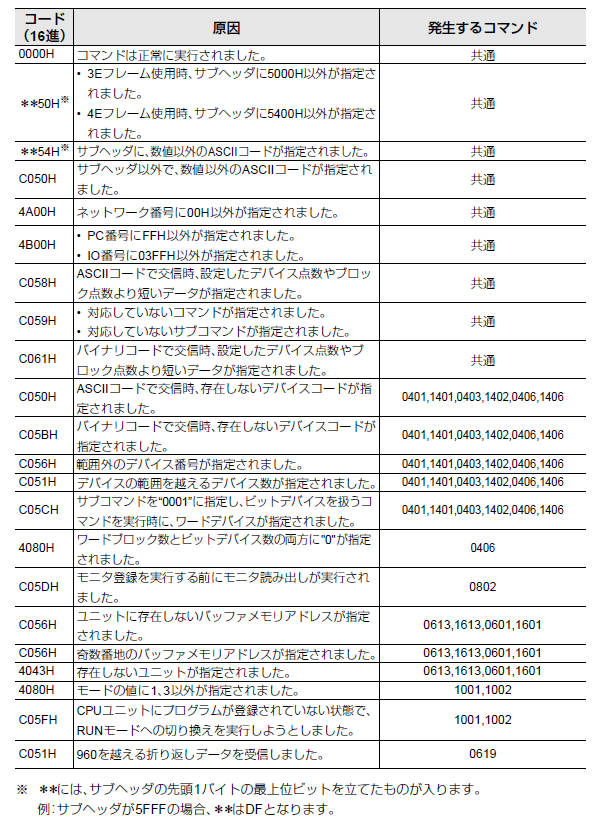

# ＵＤＰ／ＩＰ接続のサンプル

## 関数登録

- 関数にする必要はありませんが 色々デバイスを入れ替えて動作確認しやすいよう一部関数化してます。

In [1]:
#必要なモジュールの読み込み
import socket

# 通信プロトコルの関数化  ※UDP接続の場合
class MySocketUDP:
    
    # Initialize（接続するＩＰとポートの登録）
    def __init__(self, sock=None):
        
        print('init')
        if sock is None:
            self.sock = socket.socket(
                            socket.AF_INET, socket.SOCK_DGRAM)
        else:
            self.sock = sock
  
    # 送信処理
    def mysendUDP(self, msg):
        print('mysend:', msg)
        self.sock.sendto(msg, (host_ip,host_port))

    # 受信処理
    def myreceiveUDP(self):
        print('myreceive')
        data=[]
        data=(self.sock.recv(1024))
      
        return data

## 送受信処理（共通部分）

- 送受信データは 分かり易いようにブロック毎に変数で分けてありますが 一つの文字列として記述して送信しても構いません

In [4]:
# 接続先イーサネットの情報'
host_ip = '192.168.1.32'   #このIPは接続するPLCに合わせ変更する
host_port = 5000             #このポート№は PLCに合わせる（取説 or ユニットの設定値を参照）

# 接続処理
myapp = MySocketUDP()

# 送信SubHeader(固定値部分）の生成（値はイーサネットユニット取説参照）
subheader ='5000'     # 3Eﾌﾚｰﾑ時の固定値
net ='00'             # ﾈｯﾄﾜｰｸ番号
pc ='FF'              # PC番号
unitio ='03FF'        # 要求ユニットI/O番号
unitno ='00'          # 要求ユニット局番号

msg_subhead = subheader + net + pc + unitio + unitno 

init


### 以下のセル単位を繰り返すと値を取得（終了処理は自動終了のため不要）

- ここからの各変数の値は 必要に応じて変更してください。

## 一括読み出し

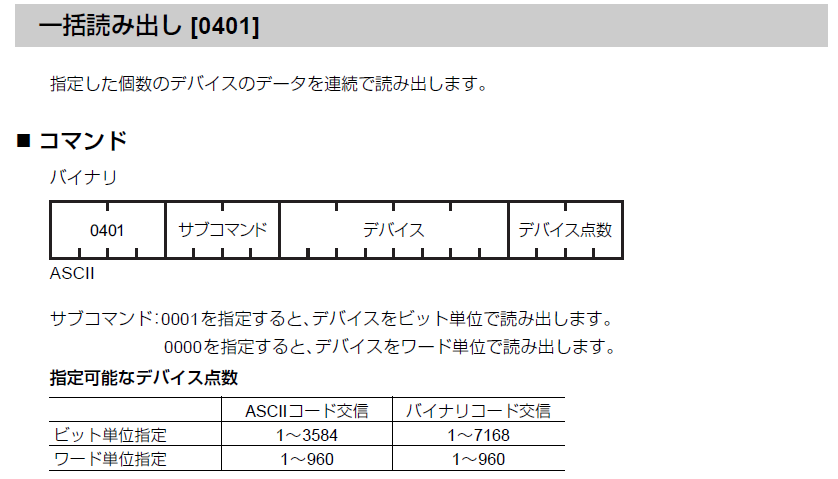

## データメモリの値を取得

タイマ、カウンタの現在値を取得するのも デバイス名を変更するだけでやり方は同じ

In [5]:
#送信コード指定
nlen ='0018'          # 要求データ長（cputimerから続く文字数を、16進指定） '001004010000D*0016100001'だと24文字なので16進で&H18となる
cputimer ='0010'      # CPU監視タイマ（16進指定で 1単位 250ミリ秒）
command='0401'        # 一括読み出しコマンド
subcommand='0000'     # ワード（4ビット）単位で読み込む
device='D*001610'     # デバイス名（D*:データメモリ） ※10進数
number='0001'         # deviceで指定したデバイスを起点として連続で読み込むワード数（最大 960）

# 送受信（1行目が送信で2行目が受診コード）
myapp.mysendUDP((msg_subhead +  nlen + cputimer + command + subcommand + device + number).encode('utf-8'))
ret=myapp.myreceiveUDP().decode('utf-8')
print('receive:', ret)

# 終了コードで正常、異常の判別を行い、値を取り出す
endcode = ret[18:22]

if endcode == '0000':
    print ('取得結果：','(16進) ',ret[22:],' (10進) ',int(ret[22:], 16))
else:
    #endcode部分の4桁がエラー№
    print ('エラー発生：',ret[18:]) 

mysend: b'500000FF03FF000018001004010000D*0016100001'
myreceive
receive: D00000FF03FF00000800000000
取得結果： (16進)  0000  (10進)  0


## リレーの状態を取得する

- ここではビット単位で読み込む形にしています。
- ビットデバイスをビット単位で指定する場合は、指定したデバイスから指定デバイス点数分を左から順にONであれば"1"(31H)，OFFであれば"0"(30H)で表わします。
- 複数のリレーを扱う場合は データ部分は以下のような順序になります。（例は書き込み時の記述なので読み込み時はデバイス点数までが送信データ、受診データ側にデータ部分となります）

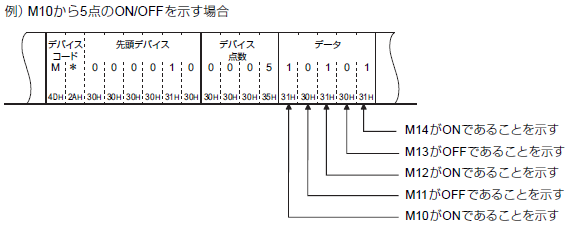

- リレー（外部入出力）のみデバイスの指定は16進らしいので注意

### 重要！

リレー（内部など含む）デバイス№をそのまま指定しても正常に動作しません。

デバイス№ 3桁目以上の値 ×１６ ＋ 下位2桁 の値で指定してください

（デバイスは 各00～15 で次の桁へ移ります。アドレス00からいくつ目といった指定です）

例 MR4200 の場合は 42×16+0 ＝ 672となり、`M*000672` と送信しないと正常に作動しません。

In [6]:
#送信コード指定
nlen ='0018'          # 要求データ長（cputimerから続く文字数を、16進指定）
cputimer ='0010'      # CPU監視タイマ（16進指定で 1単位 250ミリ秒）
command='0401'        # 一括読み出しコマンド
subcommand='0001'     # ビット単位で読み込む
device='M*000672'     # デバイス名（M*:内部補助リレー）
number='0010'         # deviceで指定したデバイスを起点として連続で読み込むビット数（最大 3584）
# 送受信
myapp.mysendUDP((msg_subhead +  nlen + cputimer + command + subcommand + device + number).encode('utf-8'))
ret=myapp.myreceiveUDP().decode('utf-8')
print('receive:', ret)

# 終了コードで正常、異常の判別を行い、値を取り出す
end_code = ret[18:22]

if end_code == '0000':
    print ('取得結果：',ret[22:])
else:
    print ('エラー発生：',ret[18:])

mysend: b'500000FF03FF000018001004010001M*0006720010'
myreceive
receive: D00000FF03FF00001400000000000000000000
取得結果： 0000000000000000


## 一括書き込み

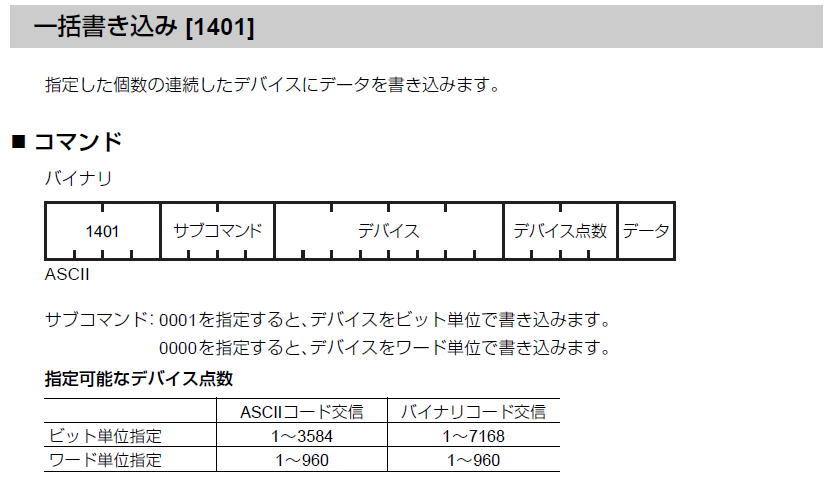

## データメモリへ値を書き込む（この操作でPLCの動作が変わるので誤作動に注意）

- ﾀｲﾏ、ｶｳﾝﾀなどの設定値（数値指定）は変更できません。可変にしたい場合は ラダーでDM参照する形にすれば該当DMを変えることで設定変更が可能

In [7]:
#送信コード指定
nlen ='001C'          # 要求データ長（cputimerから続く文字数を、16進指定）
cputimer ='0010'      # CPU監視タイマ（16進指定で 1単位 250ミリ秒）
command='1401'        # 一括書込み
subcommand='0000'     # ワード（4ビット）単位で書き込む
device='D*020007'     # デバイス名（M*:内部補助リレー）※10進数
number='0001'         # 連続で読み込むワード数（最大 960）
writedata = '0000'    # 書き込む値（16進表記）
# 送受信
myapp.mysendUDP((msg_subhead +  nlen + cputimer + command + subcommand + device + number + writedata).encode('utf-8'))
ret=myapp.myreceiveUDP().decode('utf-8')
print('receive:', ret)

# 終了コードで正常、異常の判別を行い、値を取り出す
end_code = ret[18:22]

if end_code == '0000':
    print ('書き込み完了')
else:
    print ('エラー発生：',ret[18:])

mysend: b'500000FF03FF00001C001014010000D*02000700010000'
myreceive
receive: D00000FF03FF0000040000
書き込み完了


## リレーの状態を変える（この操作でPLCの動作が変わるので誤作動に注意）

In [8]:
#送信コード指定
nlen ='0019'          # 要求データ長（cputimerから続く文字数を、16進指定）
cputimer ='0010'      # CPU監視タイマ（16進指定で 1単位 250ミリ秒）
command='1401'        # 一括書込み
subcommand='0001'     # ビット単位で書き込む
device='M*000672'     # デバイス名（M*:内部補助リレー）
number='0001'         # 連続で読み込むビット数（最大 3584）
writedata = '1'    # 書き込む値
# 送受信
myapp.mysendUDP((msg_subhead +  nlen + cputimer + command + subcommand + device + number + writedata).encode('utf-8'))
ret=myapp.myreceiveUDP().decode('utf-8')
print('receive:', ret)

# 実際の値は受信データから以下の不要な部分を除外する
# 以下は retが 'D00000FF03FF0000080000'の場合
# subheader = 'D000'  --> ﾚｽﾎﾟﾝｽのﾍｯﾀﾞ
# net ='00'           -->        ﾈｯﾄﾜｰｸ番号
# pc ='FF'            -->        PC番号
# unitio ='03FF'      -->        要求ユニットI/O番号
# unitno ='00'        -->        要求ユニット局番号
# nlen ='0008'        -->        応答データ長（16進）
# endcode = '0000'    -->        終了コード(0000以外はエラーコード）
# data = 無し         -->        戻り値はありません

end_code = ret[18:22]

if end_code == '0000':
    print ('書き込み完了')
else:
    print ('エラー発生：',ret[18:])

mysend: b'500000FF03FF000019001014010001M*00067200011'
myreceive
receive: D00000FF03FF0000040000
書き込み完了


## ＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊

## TCP接続の例

今回 使っていないので 割愛（下記 リンク先が参考になると思います。）
基本的には  UDP接続に  connect処理とclose処理が追加になるのと sendto がsendに変わるようです。

- 参考１：https://qiita.com/Tatsuya-8888/items/28cc12dd637c0866fd1c
- 参考２：http://www7b.biglobe.ne.jp/~raspberry_arduino/

UDPのサンプルで記載した関数部分はこんな感じになる模様

In [31]:
import socket


class MySocket:

    def __init__(self, sock=None):
        print('init')
        if sock is None:
            self.sock = socket.socket(
                            socket.AF_INET, socket.SOCK_STREAM)
        else:
            self.sock = sock

    def connect(self, host, port):
       print('connect')
       try:
           self.sock.connect((host, port))
           return 0
       except socket.error:
           print('コネクトエラーです')
           return -1

    def close(self):
       print('CLOSE')
       
       try:
           self.sock.close()
           return 0
       except socket.error:
           print('クロ-ズエラーです')
           return -1

    def mysend(self, msg):
        print('mysend')
        try:
            self.sock.send(msg.encode('utf-8'))
        except:
            return -1

        
    def myreceive(self):
        print('myreceive')
        data=[]
        try:
            data=(self.sock.recv(1024))
        except:
            return -1
        return data
